
1) С помощью метода наименьших квадратов аппроксимируйте функцию y(t) = $𝑡^3$ на отрезке [0,1] c помощью функции <br>
f(t, n) = $\sum_{i=0}^n$ $a_{i}$ * sin( (2*i + 1) * $\pi\$/2 * t). Нарисуйте, зависимости 𝑓(𝑡, 𝑛) для n=1,2,5, 7.

2) Постройте и объясните зависимость погрешности аппроксимации от
числа членов ряда Фурье для фукции п.1., заданной в тысяче точек на
отрезке [0,1].

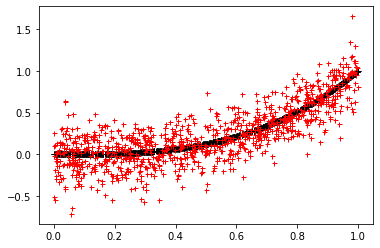

In [43]:
#Генерируем зашумлённые эксперементальные данные

import numpy as np
import matplotlib.pyplot as plt


def func(t):
    return t**3


def gen_data(f, m, xlims=(0, 1), s=0):
    x = np.random.uniform(xlims[0], xlims[1], m+1)
    y = f(x)
    if s > 0:
        y += np.random.normal(0, s, m+1)
    return x, y


x, y = gen_data(func, 1000)
plt.plot(x, y, 'k+', lw=2)

x, y = gen_data(func, 1000, s=0.2)
plt.plot(x, y, 'r+', ms=5)

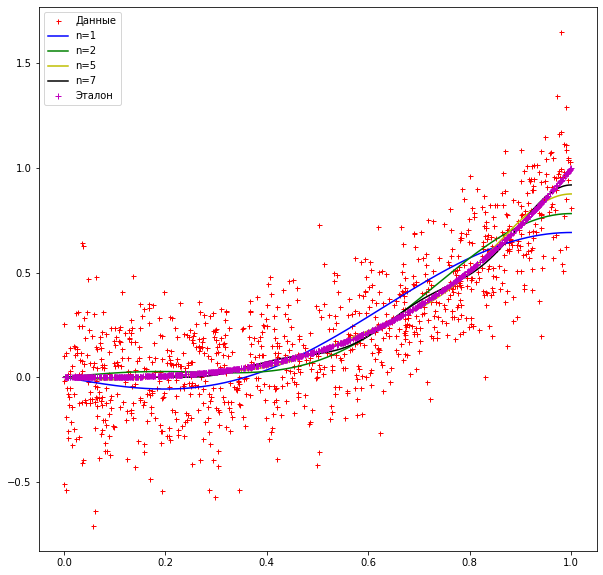

In [44]:
def pol_model(x, y, n):
    m = len(x)
    A = np.zeros((m, n+1))
    for i in range(m):
        for j in range(n+1):
            A[i, j] = np.sin((2*j + 1) * np.pi/2 * x[i])
    r = np.linalg.lstsq(A, y, rcond=-1)
    return r[0]


def poly_val(x, a):
    res = []
    for i in range(len(x)):
        s = 0
        for j in range(len(a)):
            s += a[j]*np.sin((2*j + 1) * np.pi/2 * x[i])
        res.append(s)
    return res

plt.figure(figsize=(10, 10))
plt.plot(x, y, 'r+', ms=5, label='Данные')

xx = np.linspace(0, 1, 1000)
a = pol_model(x, y, 1)
yy = poly_val(xx, a)
plt.plot(xx, yy, 'b-', ms=5, label='n=1')

a = pol_model(x, y, 2)
yy = poly_val(xx, a)
plt.plot(xx, yy, 'g-', ms=5, label='n=2')

a = pol_model(x, y, 5)
yy = poly_val(xx, a)
plt.plot(xx, yy, 'y-', ms=5, label='n=5')

a = pol_model(x, y, 7)
yy = poly_val(xx, a)
plt.plot(xx, yy, 'k-', ms=5, label='n=7')

xx, yy = gen_data(func, 1000)
plt.plot(xx, yy, 'm+', lw=2, label='Эталон')
plt.legend()

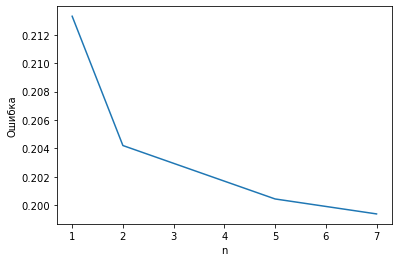

In [55]:
def get_errs(x, y, ns):
    errs = []
    for i, n in enumerate(ns) :
        a = pol_model(x, y, n)
        errs.append(np.std(y - poly_val(x, a)))
    return errs

ns = [1, 2, 5, 7]
errs = get_errs(x, y, ns)
plt.xlabel('n')
plt.ylabel('Ошибка')
plt.plot(ns, errs)